In [1]:
import pandas as pd
import os
import numpy as np
import cv2
import shapely b
import imutils

ModuleNotFoundError: No module named 'imutils'

In [72]:
#open manual annotated image from geojson (exported qupath image as geojason because paquo installation failed)
from shapely.geometry import shape, GeometryCollection
import json
#import geopandas as gpd

with open(r"C:\Users\kyuha\Desktop\11.geojson") as f:
  features = json.load(f)["features"]

In [73]:
manual_annotation = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in features])

In [4]:
#coordinates = []
#for feature in features:
    #coordinate = feature['geometry']['coordinates']
    #coordinates.append(coordinate)

In [74]:
coordinates = [np.squeeze(_['geometry']['coordinates']) for _ in features]
coordinates_arr = np.array(coordinates)

In [86]:
def cntcent(cnt):
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return [cX,cY]

#function that calculates area based on contour
#parameter cnt: contour
#return: area
def cntarea(cnt):
    cnt = np.array(cnt)
    try:
        area = cv2.contourArea(cnt)
    except:
        area = cv2.contourArea(cnt+1)
    return area

In [87]:
[cx,cy]=cntcent(coordinates_arr[0])

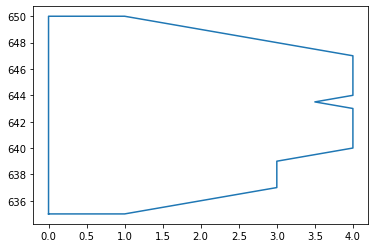

In [77]:
from matplotlib import pyplot as plt
plt.plot(arr[:,0],arr[:,1])

In [88]:
cent = np.zeros((len(coordinates_arr),2))
areas = np.zeros((len(coordinates_arr),1))
for idx,arr in enumerate(coordinates_arr):
    [cx,cy]=cntcent(arr)
    contours = arr[0] if imutils.is_cv2() else arr[1]
    areas[idx] = cntarea(arr)
    cent[idx,:] = cx,cy

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:315: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::contourArea'


In [42]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(cent) #build model
distances, indices = nbrs.kneighbors(cent) #query point

In [45]:
distance = distances[:, 1]
distance

array([19.02629759, 28.46049894, 23.43074903, 29.41088234, 21.02379604,
       24.20743687, 28.01785145, 28.65309756, 21.1896201 , 21.02379604,
       21.02379604, 22.47220505, 22.47220505, 24.75883681, 18.68154169,
       18.68154169, 21.84032967, 13.41640786, 13.41640786, 17.69180601,
       17.69180601, 25.17935662, 16.4924225 , 22.09072203, 17.08800749,
       22.09072203, 24.04163056, 24.75883681, 21.09502311, 21.09502311,
       20.61552813, 18.02775638, 21.58703314, 19.72308292, 14.        ,
       14.        , 25.61249695, 17.02938637, 15.23154621, 20.51828453,
       17.02938637, 17.4642492 , 16.64331698, 26.2488095 , 18.86796226,
       19.92485885, 16.2788206 , 15.        , 24.04163056, 15.        ,
       12.20655562, 21.26029163, 21.9544984 , 18.60107524, 27.73084925,
       31.82766093, 20.61552813, 23.32380758, 26.17250466, 18.86796226,
       18.86796226, 21.26029163, 22.02271555, 19.6977156 , 19.6977156 ,
       16.64331698, 17.4642492 , 24.69817807, 24.69817807, 26.47

In [28]:
#open hovernet image
src = r'\\fatherserverdw\Q\research\images\skin_aging\hovernet_tile\TILE\imID_8_sec_1\out\json'
fn = '11.json'

In [29]:
json = pd.read_json(os.path.join(src,fn),orient='records')

In [30]:
centroid = [_['centroid'] for _ in json.nuc]
contour = [_['contour'] for _ in json.nuc]
bbox = [_['bbox'] for _ in json.nuc]

In [17]:
#hovernet image dataframe
df = pd.DataFrame({'centroid':centroid,'contour':contour,'bbox':bbox})

In [18]:
#add area to hovernet dataframe
df['Area'] = df['contour'].apply(lambda row: cntarea(row))

In [35]:
#calculate centroid for manual annotation

#for each centroid from manual annotation, find nearest centroid in hovernet

In [ ]:
#compare hovernet contour (df) and manual annotation coordinates
#i.e. compare the centriods from hovernet and manual
#does order matter? training vs.target?
X = [[0], [1], [2], [3]] #training set
y = [0, 0, 1, 1] #target set
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
# all above is to create a map of centroid using X,y which is centroid in manual annotation

centroid_ID = []
for x,y in hovernet_centroids:
    centroid_ID.append(neigh.predict([x,y])) # predict function requires query point which is centroid in hovernet predict contour's centroid
